In [151]:
"""
Image name as {y}_{x}_{hue}_in_{filter}.eps
"""

'\nImage name as {y}_{x}_{hue}_in_{filter}.eps\n'

In [152]:
import os
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
def all_average_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    AdditiveSynthesizer_datas = []
    ViewWeightingSynthesizer_datas = []
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all.csv')
    df = df.append(df_tmp)

    ax_psnr = sns.barplot(x='QP', y='psnr_mean', data = df, capsize=.1)
    ax_psnr.set_title(f'Average PSNR')
    ax_psnr.set(xlabel="QP", ylabel="PSNR")
    ax_psnr.set(ylim=(30,50), yticks=[i for i in range(30,51,5)])
    plt.savefig('./img/all_psnr_average_in_QP.eps', dpi=300)
    plt.show()

In [154]:
def quality_and_bitrate_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/bitrate"):
        os.system(f"mkdir ./img/bitrate")
    
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)

    # ['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat']
    scene = 'ArchVizInterior'

    df_tmp = df
    fliter = (df["camera_position"] != 'sphere_6x6') 
    df_tmp = df_tmp[fliter]
    fliter1 = (df["pose_traces"] == 'pose0') 
    df_tmp = df_tmp[fliter1]
    filter2 = (df["synthesizer"] == 'AdditiveSynthesizer')
    df_tmp = df_tmp[filter2]
    filter3 = (df["scene"] == scene)
    df_tmp = df_tmp[filter3]

    ax = sns.lineplot(x='bitrate', y='psnr_mean', hue='camera_position', data = df_tmp)
    ax.set(xlabel="bitrate(bit)", ylabel="PSNR(db)")
    plt.legend(title="")
    plt.savefig(f'./img/bitrate/psnr_bitrate_camera_position_in_{scene}_pose0.eps', dpi=300)
    plt.savefig(f'./img/bitrate/psnr_bitrate_camera_position_in_{scene}_pose0.png', dpi=300)
    plt.xlim((0.0,1.75*1e7))
    plt.ylim((40,50))
    plt.show()

    ax = sns.lineplot(x='bitrate', y='ssim_mean', hue='camera_position', data = df_tmp)
    ax.set(xlabel="bitrate(bit)", ylabel="SSIM")
    plt.legend(title="")
    plt.savefig(f'./img/bitrate/ssim_bitrate_camera_position_in_{scene}_pose0.eps', dpi=300)
    plt.savefig(f'./img/bitrate/ssim_bitrate_camera_position_in_{scene}_pose0.png', dpi=300)
    plt.xlim((0.0,1.75*1e7))
    plt.ylim((0.85,1.0))
    plt.show()

    ax = sns.lineplot(x='bitrate', y='vmaf_mean', hue='camera_position', data = df_tmp)
    ax.set(xlabel="bitrate", ylabel="Vmaf")
    plt.legend(title="", labels=['RVS-based', 'VWS'])
    plt.savefig(f'./img/bitrate/vmaf_bitrate_camera_position_in_{scene}_pose0.eps', dpi=300)
    plt.savefig(f'./img/bitrate/vmaf_bitrate_camera_position_in_{scene}_pose0.png', dpi=300)
    plt.xlim((0.0,1.75*1e7))
    plt.ylim((20,60))
    plt.show()


In [155]:
def quality_and_encoding_time_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/time_plot"):
        os.system(f"mkdir ./img/time_plot")
    
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)
    
    for scene in scenes:
        df_tmp = df
        filter1 = (df["synthesizer"] == 'AdditiveSynthesizer')
        df_tmp = df_tmp[filter1]
        filter2 = (df["scene"] == scene)
        df_tmp = df_tmp[filter2]
        
        ax = sns.lineplot(x='vmaf_mean', y='TMIV_encoding_time', hue='camera_position', data = df_tmp)
        ax.set_title(f'Quality and Encoding time in {scene}')
        ax.set(xlabel="Vmaf", ylabel="Time(sec)")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        # plt.savefig(f'./img/bitrate/bitrate_psnr_camera_position_in_{scene}.eps', dpi=300)
        # plt.savefig(f'./img/bitrate/bitrate_psnr_camera_position_in_{scene}.png', dpi=300)
        # plt.xlim((25,85))
        plt.ylim((0.0,750.0))
        plt.show()

In [156]:
def quality_and_decoding_time_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/time_plot"):
        os.system(f"mkdir ./img/time_plot")
    
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)
    
    for scene in scenes:
        df_tmp = df
        filter1 = (df["synthesizer"] == 'AdditiveSynthesizer')
        df_tmp = df_tmp[filter1]
        filter2 = (df["scene"] == scene)
        df_tmp = df_tmp[filter2]
        
        ax = sns.lineplot(x='vmaf_mean', y='TMIV_decoding_time', hue='camera_position', data = df_tmp)
        ax.set_title(f'Quality and Decoding time in {scene}')
        ax.set(xlabel="Vmaf", ylabel="Time(sec)")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        # plt.savefig(f'./img/bitrate/bitrate_psnr_camera_position_in_{scene}.eps', dpi=300)
        # plt.savefig(f'./img/bitrate/bitrate_psnr_camera_position_in_{scene}.png', dpi=300)
        # plt.xlim((25,85))
        plt.ylim((0.0,3000.0))
        plt.show()

In [157]:
def bitrate_and_time_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/time_plot"):
        os.system(f"mkdir ./img/time_plot")
    
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)
    
    for scene in scenes:
        df_tmp = df
        filter1 = (df["synthesizer"] == 'AdditiveSynthesizer')
        df_tmp = df_tmp[filter1]
        filter2 = (df["scene"] == scene)
        df_tmp = df_tmp[filter2]
        filter2 = (df["pose_traces"] == 'pose1')
        df_tmp = df_tmp[filter2]
        

        total_time = df['TMIV_encoding_time'] + df['TMIV_decoding_time']
        # print(total_time)
        
        ax = sns.lineplot(x='bitrate', y=total_time, hue='camera_position', data = df_tmp)
        ax.set_title(f'Bitrate and Total time in {scene}')
        ax.set(xlabel="Bitrate(bit)", ylabel="Time(sec)")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        # plt.savefig(f'./img/bitrate/bitrate_psnr_camera_position_in_{scene}.eps', dpi=300)
        # plt.savefig(f'./img/bitrate/bitrate_psnr_camera_position_in_{scene}.png', dpi=300)
        # plt.xlim((25,85))
        # plt.ylim((0.0,3000.0))
        plt.show()

In [158]:
def quality_metrics_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/synthesizer"):
        os.system(f"mkdir ./img/synthesizer")
    

    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all.csv')
    df = df.append(df_tmp)

    # all pose trace use the same reference source
    fliter1 = (df["QP"] == 20) 
    df_QP = df[fliter1]

    # all in one figure
    for metric in ['psnr', 'ssim', 'vmaf']:
        fliter2 = (df["camera_position"] != 'sphere_6x6') 
        df_QP = df[fliter2]
        df_QP.to_csv(f"./test.csv", index=False)

        ax = sns.barplot(x='synthesizer', y=f'{metric}_mean', hue='camera_position', data = df_QP)
        ax.set_title(f'{metric} in All')
        ax.set(xlabel="", ylabel=f"{metric}")
        # plt.xticks(rotation=60)
        # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_all.eps', dpi=300)
        plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_all.png', dpi=300)
        plt.show()
        plt.clf()
    
    # based on synthesizer
    for scene in scenes:
        for metric in ['psnr', 'ssim', 'vmaf']:
            filter2 = (df_QP["scene"] == scene)
            df_scene = df_QP[filter2]
            df_scene.to_csv(f"./test.csv", index=False)

            ax = sns.barplot(x='synthesizer', y=f'{metric}_mean', hue='camera_position', data = df_scene)
            ax.set_title(f'{metric} in {scene}')
            ax.set(xlabel="", ylabel=f"{metric}")
            # plt.xticks(rotation=60)
            # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_{scene}.eps', dpi=300)
            plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_{scene}.png', dpi=300)
            plt.show()
            plt.clf()

    # based on camera position
    for scene in scenes:
        for metric in ['psnr', 'ssim', 'vmaf']:
            filter2 = (df_QP["scene"] == scene)
            df_scene = df_QP[filter2]
            df_scene.to_csv(f"./test.csv", index=False)

            ax = sns.barplot(x='camera_position', y=f'{metric}_mean', hue='synthesizer', data = df_scene)
            ax.set_title(f'{metric} in {scene}')
            ax.set(xlabel="", ylabel=f"{metric}")
            # plt.xticks(rotation=60)
            # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_{scene}.eps', dpi=300)
            plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_{scene}.png', dpi=300)
            plt.show()
            plt.clf()

In [159]:
def arc_and_flat(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/arc_and_flat"):
        os.system(f"mkdir ./img/arc_and_flat")
    

    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all.csv')
    df = df.append(df_tmp)

    # all pose trace use the same reference source
    df_scene = df_camera_position = df.loc[(df["scene"] == 'RealisticRendering') & (df["QP"] == 20) & (df['synthesizer'] == 'AdditiveSynthesizer')]
    df_camera_position = df_scene.loc[(df_scene["camera_position"] == 'sphere_6x6') | (df_scene["camera_position"] == '6x6')]
    df_camera_position.to_csv(f"./test.csv", index=False)
    
    # focus on two camera position
    for metric in ['psnr', 'ssim', 'vmaf']:
        ax = sns.barplot(x='camera_position', y=f'{metric}_mean', data = df_camera_position)
        ax.set_title(f'{metric} in RealisticRendering')
        ax.set(xlabel="", ylabel=f"{metric}")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(f'./img/arc_and_flat/{metric}_camera_position_arc_and_flat_in_AdditiveSynthesizer_rec20.eps', dpi=300)
        plt.savefig(f'./img/arc_and_flat/{metric}_camera_position_arc_and_flat_in_AdditiveSynthesizer_rec20.png', dpi=300)
        plt.show()
        plt.clf()
    
    # focus on each pose trace
    for metric in ['psnr', 'ssim', 'vmaf']:
        ax = sns.barplot(x='pose_traces', y=f'{metric}_mean', hue='camera_position', data = df_camera_position)
        ax.set_title(f'{metric} in RealisticRendering')
        ax.set(xlabel="", ylabel=f"{metric}")
        # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(f'./img/arc_and_flat/{metric}_pose_traces_arc_and_flat_in_AdditiveSynthesizer_rec20.eps', dpi=300)
        plt.savefig(f'./img/arc_and_flat/{metric}_pose_traces_arc_and_flat_in_AdditiveSynthesizer_rec20.png', dpi=300)
        plt.show()
        plt.clf()

    # focus on bitrate in two camera position
    ax = sns.barplot(x='camera_position', y=f'bitrate', data = df_camera_position)
    ax.set_title(f'Bitrate in RealisticRendering')
    ax.set(xlabel="", ylabel=f"Bitrate")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(f'./img/arc_and_flat/bitrate_camera_position_arc_and_flat_in_AdditiveSynthesizer_rec20.eps', dpi=300)
    plt.savefig(f'./img/arc_and_flat/bitrate_camera_position_arc_and_flat_in_AdditiveSynthesizer_rec20.png', dpi=300)
    plt.show()
    plt.clf()

    # focus on time in two camera position
    df_tmp1 = df_camera_position.loc[(df_camera_position["camera_position"] == "6x6")]
    df_tmp2 = df_camera_position.loc[(df_camera_position["camera_position"] == "sphere_6x6")]
    total_time_6x6 = (df_tmp1['TMIV_encoding_time'].sum() + df_tmp1['TMIV_decoding_time'].sum() + df_tmp1['x265_encoding_time'].sum() + df_tmp1['x265_decoding_time'].sum())/10
    total_time_sphere_6x6 = (df_tmp2['TMIV_encoding_time'].sum() + df_tmp2['TMIV_decoding_time'].sum() + df_tmp2['x265_encoding_time'].sum() + df_tmp2['x265_decoding_time'].sum())/10
    ax = sns.barplot(x=['6x6','6x6_sphere'], y=[total_time_6x6, total_time_sphere_6x6])
    ax.set_title(f'Time in RealisticRendering')
    ax.set(xlabel="", ylabel=f"Time(sec)")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(f'./img/arc_and_flat/time_camera_position_arc_and_flat_in_AdditiveSynthesizer_rec20.eps', dpi=300)
    plt.savefig(f'./img/arc_and_flat/time_camera_position_arc_and_flat_in_AdditiveSynthesizer_rec20.png', dpi=300)
    plt.show()
    plt.clf()

In [160]:
def time_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/time_plot"):
        os.system(f"mkdir ./img/time_plot")

    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all.csv')
    df = df.append(df_tmp)

    for scene in scenes:
        df_tmp = df.loc[(df["scene"] == scene) & (df['synthesizer'] == 'AdditiveSynthesizer')]
        df_tmp.to_csv(f"./test.csv", index=False)
        data_x = []
        data_y = []
        data_hue = []
        for QP in QPs:
            df_tmp_QP = df_tmp.loc[(df_tmp["QP"] == QP)]
            for camera_position in camera_positions:
                df_tmp_cam = df_tmp_QP.loc[(df_tmp_QP["camera_position"] == camera_position)]
                total_time = (df_tmp_cam['TMIV_encoding_time'].sum() + df_tmp_cam['TMIV_decoding_time'].sum() + df_tmp_cam['x265_encoding_time'].sum() + df_tmp_cam['x265_decoding_time'].sum())/df_tmp_cam.size
                # total_time = (df_tmp_cam['TMIV_encoding_time'].min() + df_tmp_cam['TMIV_decoding_time'].min() + df_tmp_cam['x265_encoding_time'].min() + df_tmp_cam['x265_decoding_time'].min())
                
                data_x.append(QP)
                data_y.append(total_time)
                data_hue.append(camera_position)
            

        ax = sns.barplot(x=data_x, y=data_y, hue=data_hue)
        ax.set_title(f'Time in {scene}')
        ax.set(xlabel="QP", ylabel=f"Time(sec)")
        # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(f'./img/time_plot/time_QP_camera_position_in_AdditiveSynthesizer_{scene}.eps', dpi=300)
        plt.savefig(f'./img/time_plot/time_QP_camera_position_in_AdditiveSynthesizer_{scene}.png', dpi=300)
        plt.show()
        plt.clf()

        ax_line = sns.lineplot(x=data_x, y=data_y, hue=data_hue, err_style="bars")
        ax_line.set_title(f'Time in {scene}')
        ax_line.set(xlabel="QP", ylabel=f"Time(sec)")
        # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(f'./img/time_plot/time_QP_camera_position_in_AdditiveSynthesizer_{scene}_line.eps', dpi=300)
        plt.savefig(f'./img/time_plot/time_QP_camera_position_in_AdditiveSynthesizer_{scene}_line.png', dpi=300)
        plt.show()
        plt.clf()    

In [161]:
def synthesizer_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/synthesizer"):
        os.system(f"mkdir ./img/synthesizer")

    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)

    for scene in scenes:
        camera_position = '9x4'
        # pose_trace = 'pose0'
        df_tmp = df
        df_tmp = df_tmp.loc[(df["scene"] == scene) & (df[f'camera_position'] == camera_position) & (df[f'QP'] == 50)]
        ax = sns.barplot(x='pose_traces', y=f'vmaf_mean', hue='synthesizer', data=df_tmp)
        ax.set(xlabel="camera placement", ylabel=f"PSNR(db)")    
        plt.legend(title=f"{scene}")
        plt.show()

    # QP = 20
    # for scene in scenes:
    #     df_tmp = df
    #     fliter = (df["camera_position"] != 'sphere_6x6') 
    #     df_tmp = df_tmp[fliter]
    #     df_tmp = df_tmp.loc[(df["scene"] == scene) & (df[f'QP'] == QP)]
    #     ax = sns.barplot(x='camera_position', y=f'psnr_mean', hue='synthesizer', data=df_tmp)
    #     ax.set(xlabel="camera placement", ylabel=f"PSNR(db)")
    #     plt.legend(title="")
    #     # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #     plt.savefig(f'./img/synthesizer/psnr_camera_position_synthesizer_in_rec20_{scene}.eps', dpi=300)
    #     plt.savefig(f'./img/synthesizer/psnr_camera_position_synthesizer_in_rec20_{scene}.png', dpi=300)
    #     plt.ylim((30,60))   
    #     plt.show()

    #     df_tmp = df.loc[(df["scene"] == scene) & (df[f'QP'] == QP)]
    #     ax = sns.barplot(x='camera_position', y=f'ssim_mean', hue='synthesizer', data=df_tmp)
    #     ax.set(xlabel="camera placement", ylabel=f"SSIM")
    #     plt.legend(title="")
    #     # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #     plt.savefig(f'./img/synthesizer/ssim_camera_position_synthesizer_in_rec20_{scene}.eps', dpi=300)
    #     plt.savefig(f'./img/synthesizer/ssim_camera_position_synthesizer_in_rec20_{scene}.png', dpi=300)
    #     plt.ylim((0,1.0))
    #     plt.show()

    #     df_tmp = df.loc[(df["scene"] == scene) & (df[f'QP'] == QP)]
    #     ax = sns.barplot(x='camera_position', y=f'vmaf_mean', hue='synthesizer', data=df_tmp)
    #     ax.set(xlabel="Camera placement", ylabel=f"Vmaf")
    #     plt.legend(title="")
    #     ax.legend(['RVS-based', 'VWS'])
    #     # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #     plt.savefig(f'./img/synthesizer/vmaf_camera_position_synthesizer_in_rec20_{scene}.eps', dpi=300)
    #     plt.savefig(f'./img/synthesizer/vmaf_camera_position_synthesizer_in_rec20_{scene}.png', dpi=300)
    #     plt.ylim((0,100))  
    #     plt.show()

In [162]:
def numGroups_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/numGroup"):
        os.system(f"mkdir ./img/numGroup")

    df = pd.DataFrame()
    for numGroup in numGroups:
        df_tmp = pd.read_csv(f'./results/all_nG{numGroup}.csv')
        df = df.append(df_tmp)


    scene = 'ArchVizInterior'
    df_tmp = df.loc[(df["scene"] == scene)]
    ax = sns.barplot(x='camera_position', y=f'TMIV_decoding_time', hue='numGroup', data=df_tmp)
    ax.set_title(f'TMIV decoding time in {scene}')
    ax.set(xlabel="Camera placement", ylabel=f"sec")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.savefig(f'./img/synthesizer/{metric}_camera_position_synthesizer_in_rec20_{scene}.eps', dpi=300)
    # plt.savefig(f'./img/synthesizer/{metric}_camera_position_synthesizer_in_rec20_{scene}.png', dpi=300)
    plt.show()

    scene = 'ArchVizInterior'
    df_tmp = df.loc[(df["scene"] == scene)]
    ax = sns.barplot(x='camera_position', y=f'TMIV_encoding_time', hue='numGroup', data=df_tmp)
    ax.set_title(f'TMIV encoding time in {scene}')
    ax.set(xlabel="Camera placement", ylabel=f"sec")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.savefig(f'./img/synthesizer/{metric}_camera_position_synthesizer_in_rec20_{scene}.eps', dpi=300)
    # plt.savefig(f'./img/synthesizer/{metric}_camera_position_synthesizer_in_rec20_{scene}.png', dpi=300)
    plt.show()

    print(df)

In [163]:
def siti_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/siti"):
        os.system(f"mkdir ./img/siti")

    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/scene_siti.csv')
    # df = df.append(df_tmp)
    # data = pd.DataFrame({'scene':[], 'si':[], 'ti':[]})
    # for scene in scenes:
    #     df_tmp = df.loc[(df["scene"] == scene)]
    #     si = df_tmp['si'].sum()/10
    #     ti = df_tmp['ti'].sum()/10
    #     data = data.append([scene, si, ti])
    #     print(data)
        

    # df_tmp = df
    # df_tmp = df_tmp.loc[(df["scene"] == scene) & (df[f'camera_position'] == camera_position) & (df[f'QP'] == 50)]
    ax = sns.scatterplot(x='si', y=f'ti', hue='scene', data=df_tmp)
    ax.set(xlabel="SI", ylabel=f"TI")
    plt.legend(title="")
    plt.savefig(f'./img/siti/siti.eps', dpi=300)
    plt.savefig(f'./img/siti/siti.png', dpi=300)
    plt.show()


In [164]:
def main():
    # setup paras
    # camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    # scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    # QPs = np.array([20, 36, 44, 48, 50])
    # synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    # numGroups = np.array([1])
    # pose_traces = np.array([f'pose{i}' for i in range(10)])
    # numFrame = 1

    # 1
    camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    QPs = np.array([20, 36, 44, 48, 50])
    synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    numGroups = np.array([1, 4])
    pose_traces = np.array([f'pose{i}' for i in range(10)])
    numFrame = 1

    # quality_and_bitrate_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame)
    # synthesizer_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame)
    siti_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame)

    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: './img/siti/siti.eps'

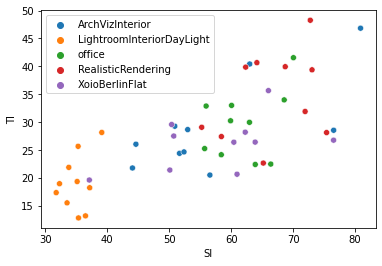

In [165]:
if __name__ == '__main__':
    main()